In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv("C:\\Users\\Caio\\Desktop\\Linear Regression - Project\\Dados\\Car details v3.csv")

In [3]:
dados.shape

(8128, 13)

In [4]:
dados.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


#### Os dados possuem NAs em algumas variáveis

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
dados.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
dados.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Analise dos dados

<AxesSubplot:xlabel='owner', ylabel='count'>

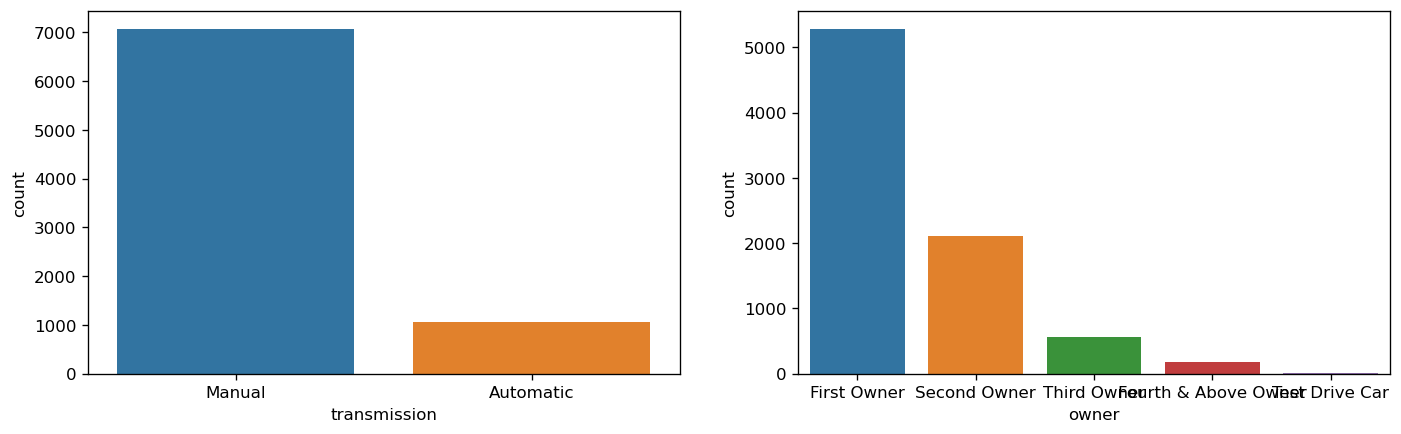

In [3]:
plt.figure(figsize=(14,4), dpi = 120)
plt.subplot(1,2,1)
sns.countplot(x='transmission',data=dados)
plt.subplot(1,2,2)
sns.countplot(x='owner',data=dados)

In [4]:
dados['transmission'].value_counts(1)

Manual       0.870817
Automatic    0.129183
Name: transmission, dtype: float64

In [5]:
dados['owner'].value_counts(1)

First Owner             0.650714
Second Owner            0.258981
Third Owner             0.068282
Fourth & Above Owner    0.021407
Test Drive Car          0.000615
Name: owner, dtype: float64

#### 87% dos registros são de automóveis de transmissão manual e 13% de transmissão automática. 


#### 65% dos automóveis são do primeiro dono e 25% do segundo dono

<AxesSubplot:xlabel='fuel', ylabel='count'>

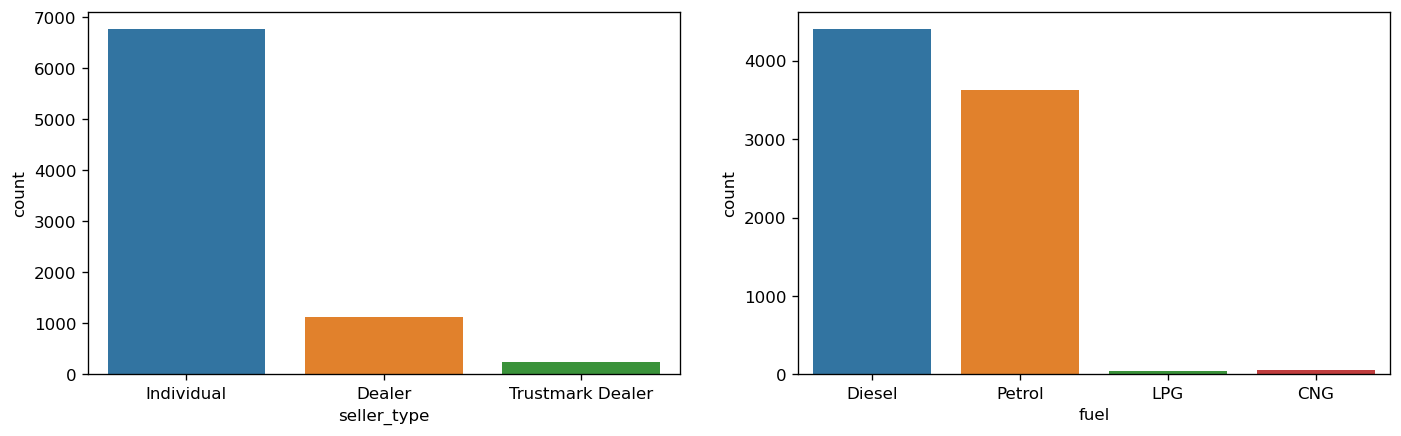

In [10]:
plt.figure(figsize = (14,4), dpi = 120)
plt.subplot(1,2,1)
sns.countplot(data = dados, x = 'seller_type')
plt.subplot(1,2,2)
sns.countplot(data = dados, x = "fuel")

In [11]:
dados['fuel'].value_counts(1)

Diesel    0.541585
Petrol    0.446727
CNG       0.007013
LPG       0.004675
Name: fuel, dtype: float64

In [12]:
dados['seller_type'].value_counts(1)

Individual          0.832431
Dealer              0.138533
Trustmark Dealer    0.029035
Name: seller_type, dtype: float64

#### 54% dos automóveis registrados neste banco utilizam Diesel enquanto 44% utiliza Petrol. O resto se divide entre o combustivel CNG e LPG

#### A variável de resposta 'Selling_price' não segue uma distribuição normal como podemos ver pelo gráfico abaixo

<AxesSubplot:>

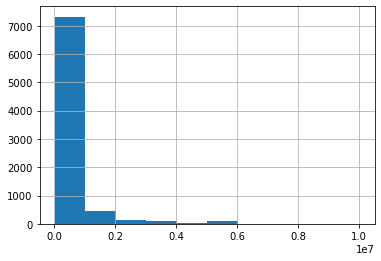

In [13]:
dados['selling_price'].hist()

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
dados.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.00000,8128.00000,8128.00000,7907.00000,7907.00000,7912.00000,7907.00000
mean,2013.80401,638271.80770,69819.51083,947.59631,1458.62502,2764.02768,5.41672
std,4.04425,806253.40351,56550.55496,925.32638,503.91630,5160.72768,0.95959
min,1983.00000,29999.00000,1.00000,0.00000,624.00000,0.00000,2.00000
25%,2011.00000,254999.00000,35000.00000,185.00000,1197.00000,100.00000,5.00000
50%,2015.00000,450000.00000,60000.00000,240.00000,1248.00000,739.00000,5.00000
75%,2017.00000,675000.00000,98000.00000,1944.00000,1582.00000,3748.00000,5.00000
max,2020.00000,10000000.00000,2360457.00000,3344.00000,3604.00000,108495.00000,14.00000


#### O automóvel mais antigo é do ano de 1983 e o mais 'novo' do ano de 2020
#### O automóvel vendido mais barato foi pelo preço de $29999 enquanto o mais caro saiu pelo preço de $10000000.. A média de preço fica por volta de $639000

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

<Figure size 720x480 with 0 Axes>

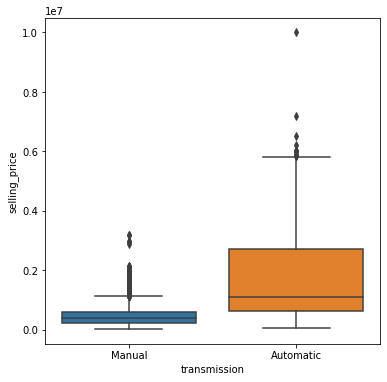

In [16]:
plt.figure(dpi = 120)

plt.subplots(figsize = (6,6))

sns.boxplot(data = dados, x = "transmission", y = "selling_price")

In [17]:
year = 2022

dados['age'] = year - dados['year']



<AxesSubplot:xlabel='engine'>

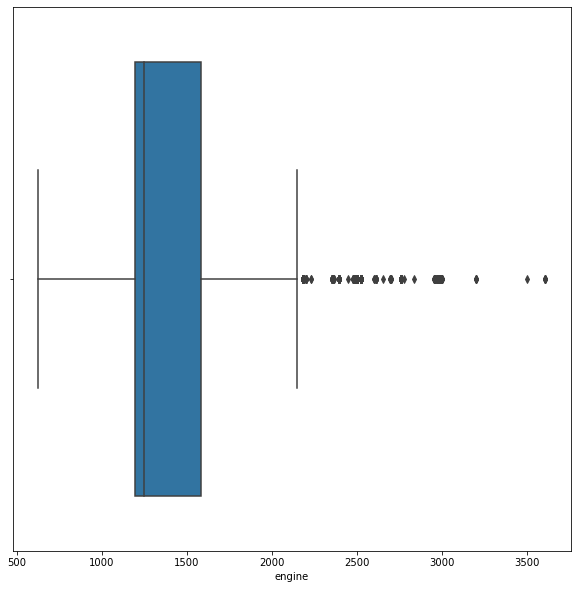

In [15]:
f, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = dados, x = 'engine')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

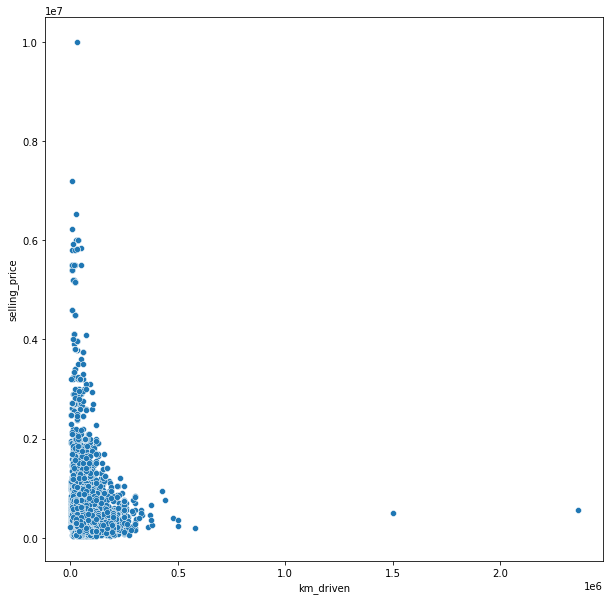

In [35]:
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data = dados,x = 'km_driven', y = 'selling_price')

c:\Users\Caio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

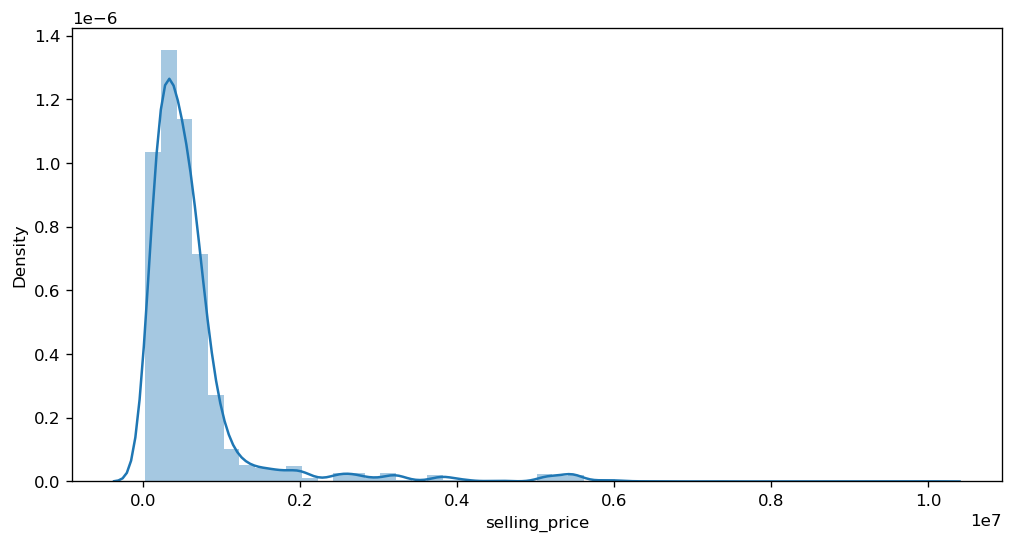

In [37]:
plt.figure(figsize = (10,5), dpi = 120)
sns.distplot(dados['selling_price'])

C:\Users\mcaio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

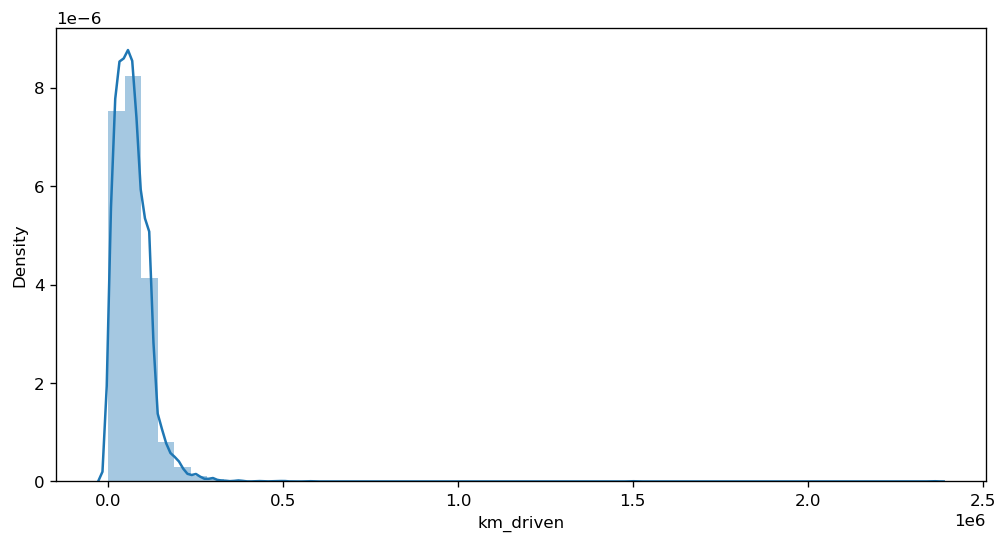

In [18]:
plt.figure(figsize = (10,5), dpi = 120)
sns.distplot(dados['km_driven'])

<AxesSubplot:xlabel='age', ylabel='selling_price'>

<Figure size 720x480 with 0 Axes>

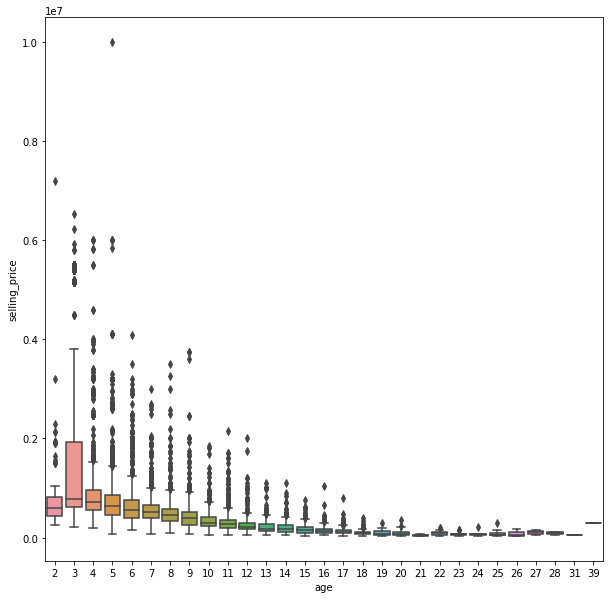

In [38]:
plt.figure(dpi = 120)
f, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = dados,x = 'age', y = 'selling_price')

In [4]:
# retirando todas as letras da coluna mileage, max_power eengine


dados['engine'] = dados['engine'].str.replace('\D', '')

dados['max_power'] = dados['max_power'].str.replace('\D', '')

dados['mileage'] = dados['mileage'].str.replace('\D', '')


# convertendo para numérico


dados['mileage'] = pd.to_numeric(dados['mileage'])

dados['max_power'] = pd.to_numeric(dados['max_power'])

dados['engine'] = pd.to_numeric(dados['engine'])

C:\Users\Caio\AppData\Local\Temp\ipykernel_12364\1670167516.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dados['engine'] = dados['engine'].str.replace('\D', '')
C:\Users\Caio\AppData\Local\Temp\ipykernel_12364\1670167516.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dados['max_power'] = dados['max_power'].str.replace('\D', '')
C:\Users\Caio\AppData\Local\Temp\ipykernel_12364\1670167516.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dados['mileage'] = dados['mileage'].str.replace('\D', '')


<AxesSubplot:xlabel='engine', ylabel='Count'>

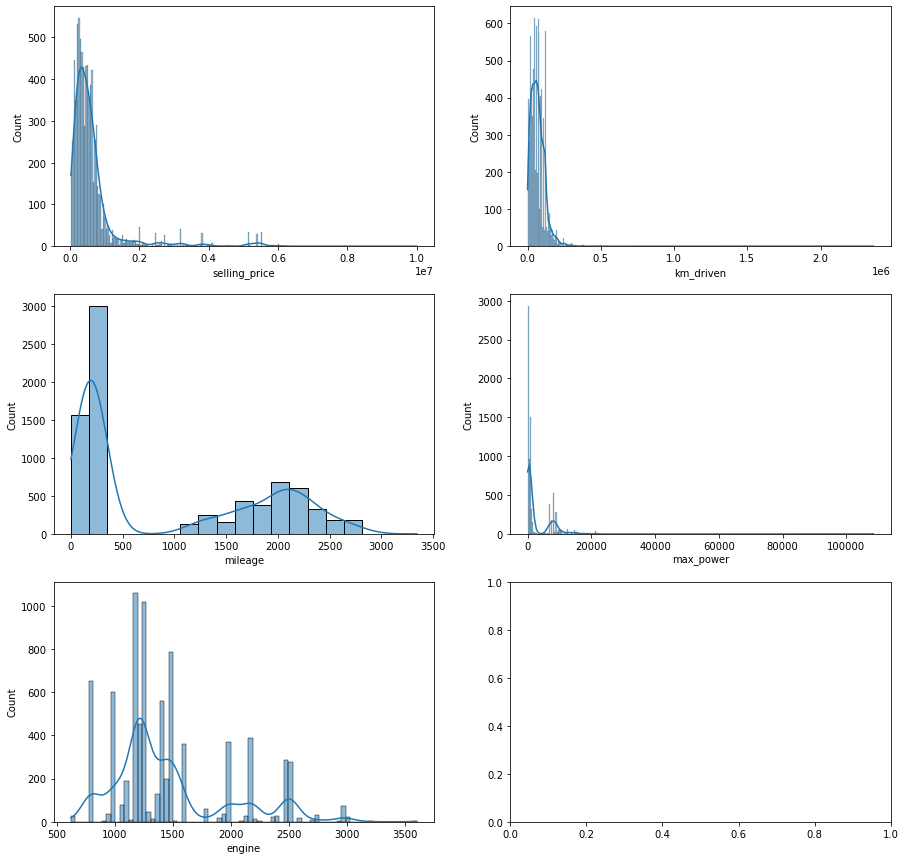

In [50]:
fig, axs = plt.subplots(3,2, figsize = (15,15))

sns.histplot(data = dados, x = 'selling_price', kde=True, ax=axs[0,0])
sns.histplot(data = dados, x = 'km_driven', kde=True, ax=axs[0,1])
sns.histplot(data = dados, x = 'mileage', kde=True, ax=axs[1,0])
sns.histplot(data = dados, x = 'max_power', kde=True, ax=axs[1,1])
sns.histplot(data = dados, x = 'engine', kde=True, ax=axs[2,0])



<AxesSubplot:>

<Figure size 720x480 with 0 Axes>

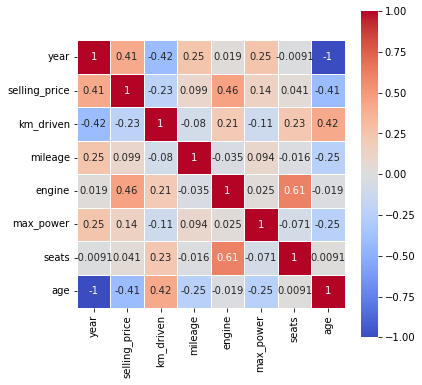

In [18]:
plt.figure(dpi = 120)

f, ax = plt.subplots(figsize = (6,6))

sns.heatmap(data = dados.corr(), annot = True, linewidths = 0.8, cmap = 'coolwarm', square = True)

### O que aprendemos com essa rápida análise exploratória ?

#### 1. Os dados possuem alguns NAs. Teremos que preenchê-los para modelar
#### 2. A maioria dos automóveis registrados possuem transmissão manual (87%) e são do primeiro (65%) e segundo dono (25%)
#### 3. Carros mais novos possuem maior variabilidade de preço (ver boxplot) do que carros antigos. Isso faz sentido pois os mais novos abrange tanto carros populares como carros de luxo. Os automóveis mais velho tendem a ser mais barato, com exceção de relíquias, carros de colecionador e afins.
#### 4. Neste banco de dados possuímos registros de automóveis desde 1983 até 2020. O preço variando entre $29999 e 10000000
#### 5. Os dados apresentam uma correlação linear moderada entre o preço de venda e o ano do veículo (0.41), entre engine e preço de venda (0.46) e também entre KMs rodados e preço de venda (-0.23)